# Building a Regression Model

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

# Task 1 and 2 - Downloading and loading dataset

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Task - 3 Visualizing the Analysis

## 3.1 Univariate analysis

(array([  13.,   66.,  180.,  344.,  513.,  812., 1017.,  934.,  275.,
          23.]),
 array([0.055 , 0.1145, 0.174 , 0.2335, 0.293 , 0.3525, 0.412 , 0.4715,
        0.531 , 0.5905, 0.65  ]),
 <BarContainer object of 10 artists>)

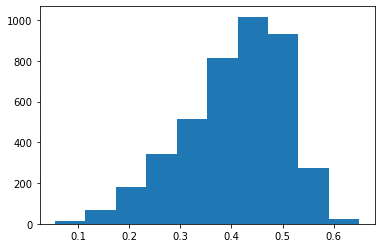

In [6]:
plt.hist(df['Diameter'])

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

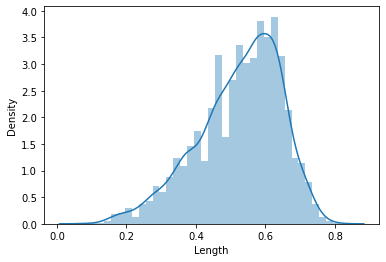

In [7]:
sns.distplot(df['Length'])

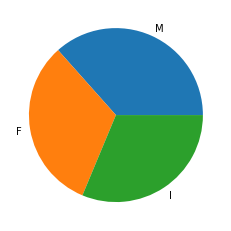

In [8]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].unique())
plt.show()

## 3.2 Bi-variate analysis

<AxesSubplot:xlabel='Diameter', ylabel='Height'>

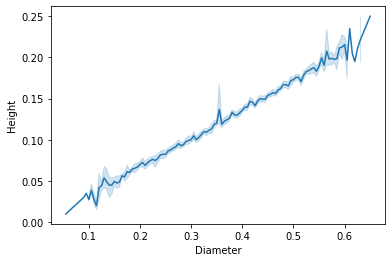

In [9]:
sns.lineplot(x=df.Diameter,y=df.Height)

<BarContainer object of 4177 artists>

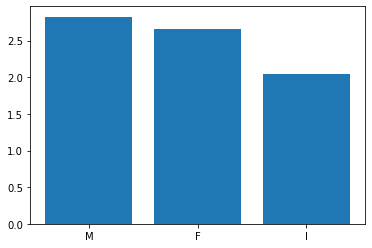

In [10]:
plt.bar(df.Sex, df['Whole weight'])

## 3.2 Multivariate analysis

<AxesSubplot:>

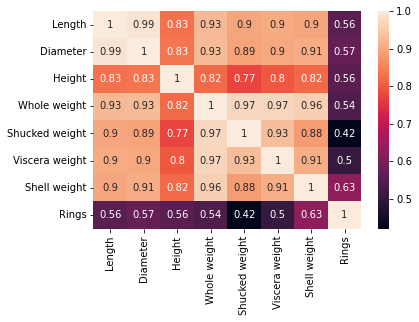

In [11]:
sns.heatmap(df.corr(),annot=True)

# Task - 4 Descriptive statistics

In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Handling missing values

In [13]:
df.isnull().any()


Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [14]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Task - 6 Finding outliers and replacing

<AxesSubplot:xlabel='Rings'>

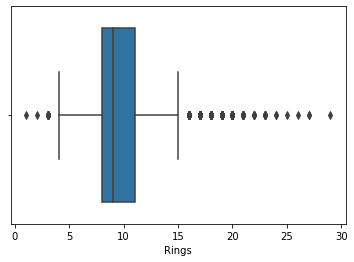

In [15]:
sns.boxplot(x=df['Rings'])

<AxesSubplot:xlabel='Diameter'>

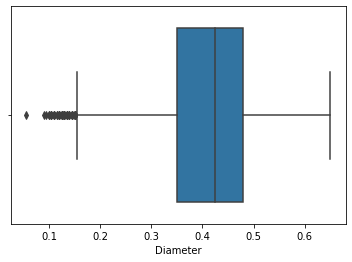

In [16]:
sns.boxplot(x=df['Diameter'])

In [18]:
## Performing Inter Quartile Range
q2 = df.Diameter.quantile(0.25)
q3 = df.Diameter.quantile(0.75)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit = q2-1.5*IQR

In [19]:
df.median()

C:\Users\divya\AppData\Local\Temp/ipykernel_54248/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [20]:
q2 = df.Diameter.quantile(0.25)
q3 = df.Diameter.quantile(0.75)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit = q2-1.5*IQR

In [21]:
print(lower_limit)
print(upper_limit)
df["Diameter"].head

0.15499999999999997
0.675


<bound method NDFrame.head of 0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Name: Diameter, Length: 4177, dtype: float64>

In [24]:
df["Diameter"] = np.where(df["Diameter"]<lower_limit,6.52,df["Diameter"])

<AxesSubplot:xlabel='Diameter'>

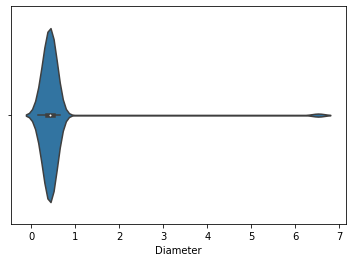

In [25]:
df["Diameter"] = np.where(df["Diameter"]<lower_limit,6.52,df["Diameter"])
sns.violinplot(x=df["Diameter"])

# Task - 7 Categorical Columns and perform Encoding

In [26]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
print(df.Sex.unique())

['M' 'F' 'I']


In [28]:
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

In [29]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Task - 8 Spit data into dependent and independent variables

In [30]:
y = df['Rings']
X = df.drop('Rings', axis=1)

In [31]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [33]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Task - 9 Scale the independent variables

In [34]:
scaled_X = pd.DataFrame(scale(X),columns=X.columns)
scaled_X


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.574558,-0.183234,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-0.320821,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,-0.107561,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.183234,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-0.334580,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,-0.066285,0.609334,0.118813,0.047908,0.532900,0.073062
4173,1.151980,0.549706,-0.080044,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,1.151980,0.632985,-0.031888,1.565767,0.708212,0.748559,0.975413,0.496955
4175,-1.280690,0.841182,-0.018130,0.250672,0.541998,0.773341,0.733627,0.410739


# Task - 10 Split the data into training and testing

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_X, y, test_size=0.3, random_state=0)

In [36]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [37]:
Xtrain

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1376,1.151980,0.799543,0.016267,0.848442,0.923373,0.955826,0.528338,1.086094
1225,-0.064355,-1.490625,-0.334580,-1.303532,-1.281263,-1.146128,-1.310147,-1.356680
2722,-0.064355,-1.240789,-0.307062,-1.064424,-1.222119,-1.191186,-1.150477,-1.241726
3387,1.151980,0.174951,-0.121320,0.131117,0.090261,-0.251727,0.140568,0.511324
2773,-1.280690,0.466427,-0.045647,0.131117,0.321738,0.498488,0.318486,0.080246
...,...,...,...,...,...,...,...,...
1033,1.151980,1.049379,0.036905,1.087551,1.617803,1.374865,1.294753,1.711157
3264,-1.280690,1.091018,0.002508,0.011563,0.696995,0.816146,1.249133,0.331708
1653,1.151980,0.591345,-0.066285,0.131117,0.265653,0.466947,0.236370,0.105392
2607,-1.280690,0.841182,-0.011250,0.609334,0.608279,0.530028,0.510090,0.572393


In [38]:
ytrain

1376    10
1225     5
2722     7
3387    18
2773    11
        ..
1033    10
3264    12
1653    10
2607     9
2732     8
Name: Rings, Length: 2923, dtype: int64

In [39]:
Xtest

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,1.151980,0.216591,-0.100682,0.370226,0.181016,-0.368878,0.569396,0.690940
1580,-0.064355,-0.199803,-0.135079,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685
3784,1.151980,0.799543,-0.025009,0.370226,0.870348,0.755318,1.764639,0.565209
463,-0.064355,-2.531611,-0.458408,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219
2615,1.151980,1.007740,0.002508,0.848442,1.390405,1.415417,1.778325,0.996287
...,...,...,...,...,...,...,...,...
1052,1.151980,2.007086,0.140095,1.924430,3.004623,2.918100,2.996378,2.742152
3439,-0.064355,-0.699476,-0.203872,-0.347099,-0.760186,-0.673019,-0.776394,-0.774725
1174,-1.280690,0.924461,-0.004371,-2.977291,0.668443,0.685478,1.162455,0.356854
2210,1.151980,1.132658,0.009388,1.446213,1.635138,0.572833,1.062091,2.666713


In [40]:
ytest

668     13
1580     8
3784    11
463      5
2615    12
        ..
1052    12
3439     8
1174     9
2210    18
2408    15
Name: Rings, Length: 1254, dtype: int64

# Task - 11 Build the model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model=LinearRegression()


# Task - 12 Training the model 

In [44]:
model.fit(Xtrain,ytrain)

LinearRegression()

# Task - 13 Testing the model

In [46]:
y_pred=model.predict(Xtest)
y_pred

array([13.23127191,  9.46967875, 10.38753278, ...,  8.86303651,
       19.26307646, 11.75320614])

# Task - 14 Measuring the performance using metrics

In [47]:
from sklearn import metrics

In [48]:
metrics.r2_score(ytest,y_pred)

0.5125513070945754

In [49]:
metrics.mean_absolute_error(ytest,y_pred)

1.621813745856289

In [50]:
metrics.mean_squared_error(ytest,y_pred)

5.139176470707493